In [2]:
%matplotlib inline
from IPython.display import *

# NLP with Neural Networks

#Contents
1. Introduction to Neural Networks
2. Language Models using Neural Networks
3. Applications of Word Vectors
4. Limitations of Word Vectors
5. Getting started...

# Introduction to Neural Networks

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/560px-Artificial_neural_network.svg.png"/>

# Vectorised Notations

Weighted sum of input:

$$
\begin{align}
\sum_i w_ix_i &= 
\left[\begin{matrix}
x_1\\
\vdots\\
x_d
\end{matrix}\right]^\top
\left[\begin{matrix}
w_1\\
\vdots\\
w_d
\end{matrix}\right] ,&
\left[\begin{matrix}
x_1\\
\vdots\\
x_d
\end{matrix}\right]^\top
\left[\begin{matrix}
w_{1,1} & \cdots & w_{1,d'}\\
\vdots & \ddots & \vdots\\
w_{d,1} & \cdots & w_{d,d'}
\end{matrix}\right]
\end{align} = 
\left[\begin{matrix} \sum_i w_{i,1}x_i & \cdots & \sum_i w_{i,d'}x_i \end{matrix} \right]
$$

Applying functions to matrices:

$$
f\left(\left[\begin{matrix}
r_{0,0} & \cdots & r_{0,d}\\
&\vdots& \\
r_{|D|,0} & \cdots & r_{|D|,d}
\end{matrix}\right]\right) =
\left[\begin{matrix}
f(r_{0,0}) & \cdots & f(r_{0,d})\\
&\vdots& \\
f(r_{|D|,0}) & \cdots & f(r_{|D|,d})
\end{matrix}\right]
$$

#Logistic Regression / Perceptron / Single-layer Neural Network

Sigmoid function for binary classification:

$$f(x) = \frac{1}{1-e^{-x ^\top W}}$$

Softmax if more than one label:

$$
\frac{1}{ \sum_{j=1}^{L}{e^{ x ^\top W_j }} }
\begin{bmatrix}
e^{ x ^\top W_1 } \\
e^{ x ^\top W_2 } \\
\vdots \\
e^{ x ^\top W_L } \\
\end{bmatrix}
$$


To optimise, log-loss function:

$$E(X,y) = - \frac{1}{n} \left[\sum_{i=1}^n  y_i \log(f(X_i)) + (1 - y_i) \log(1 - f(X_i))\right]$$

#Backpropagation

Backpropagation is gradient descent performed on the entire neural network function.

Since the neural network is composed of other neural networks, backprop is applying differentiation using the chain-rule recursively. As an example:

$$
\begin{align}
l_0 &= d\cdot x\\
l_1 &= b \cdot g(l_0) + c \cdot h(l_0)\\
y &= a \cdot f(l_1)
\end{align}
$$

$$
\begin{align}
\Delta a &= \dfrac{\partial y}{\partial a} = f(l_1) & \delta_1 = \dfrac{\partial y}{\partial l_1} &= a \cdot f'(l_1)
\end{align}
$$

$$
\begin{align}
\Delta b &= \dfrac{\partial y}{\partial b} = \dfrac{\partial y}{\partial l_1}\cdot \dfrac{\partial l_1}{\partial b} = \delta_1 \cdot g(l_0) &
\Delta c &= \dfrac{\partial y}{\partial c} = \dfrac{\partial y}{\partial l_1}\cdot \dfrac{\partial l_1}{\partial c} = \delta_1 \cdot h(l_0)\\
\dfrac{\partial l_1}{\partial l_0} &=  b \cdot g'(l_0) + c \cdot h'(l_0) & \delta_0 &= \delta_1 \cdot \dfrac{\partial l_1}{\partial l_0}\\
\end{align}
$$

$$
\begin{align}
\Delta d &= \dfrac{\partial y}{\partial d} = \dfrac{\partial y}{\partial l_1}\dfrac{\partial l_1}{\partial l_0}\dfrac{\partial l_0}{\partial d} = \delta_0\cdot x\\
\end{align}
$$

Once the gradients are computed, it's just the usual gradient descent step:

$$w_i \leftarrow w_i - \varepsilon \Delta w_i$$

##Chain rule example
Imagine a 2-layer neural network, with 3 inputs:

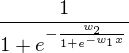

In [2]:
from sympy import *

init_printing()
sigmoid = lambda x: 1/(1 + exp(-x))
#sigmoid = Function("\sigma")
x = Symbol("x")
w_1, w_2 = Symbol("w_1"),Symbol("w_2")

f = sigmoid(w_2*sigmoid(w_1*x))
f

In [3]:
y = Symbol("y") 
error = y*log(f) - (1-y)*log(1-f)
gradient_2 = diff(error,Symbol("w_2"))
gradient_1 = diff(error,Symbol("w_1"))

In [4]:
Symbol("\delta_2")*(simplify(gradient_1/gradient_2),)

# Language Models using Neural Networks

Language model - Probability of a sequence of words in a language:

$$P(w_1,\cdots,w_N)$$

Approximation using a $k$-sized window:

$$P(w_1,\cdots,w_N) \approx \prod_{i=1}^{N} P(w_t|w_{t-1},w_{t-2},\dots,w_{t-k})$$

We can create a neural network that takes in the previous $k$ words, and outputs the probabilities of all $|V|$ words:

$$P(w_t|w_{t-1},w_{t-2},\dots,w_{t-k}) := f(w_t,w_{t-1},w_{t-2},\dots,w_{t-k})$$

##Basic Language Model
###[Bengio, Yoshua, et al. "Neural probabilistic language models." Innovations in Machine Learning. Springer Berlin Heidelberg, 2006. 137-186.](http://machinelearning.wustl.edu/mlpapers/paper_files/BengioDVJ03.pdf)

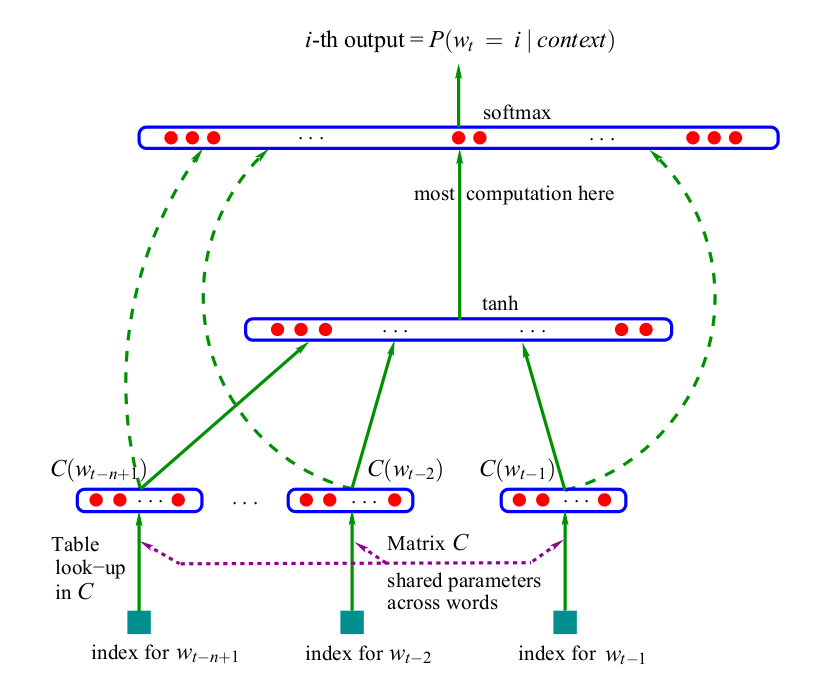

In [46]:
Image('images/bengiomodel.png')

## Key contributions

A mixed model using averaged prediction from this neural net and a trigram beats n-grams using Kneser-Ney backoff,
* with about 24% improvement on Brown corpus and
* 8% on AP news.

### Using a table lookup instead of one-hot vectors
Using a one-hot vector to represent words allows us to continue using matrix multiplications, but it is equivalent to just extracting a single row out of the word-to-vector table.

$$
\left[\begin{matrix}
0 \\
\vdots \\
1 \\
\vdots\\
0
\end{matrix} \right]^{\top}
\underbrace{\left[\begin{matrix}
r_{0,0} & \cdots & r_{0,d}\\
&\vdots& \\
r_{i,0} & \cdots & r_{i,d} \\
&\vdots&\\
r_{|V|,0} & \cdots & r_{|V|,d}
\end{matrix} \right]}_{C}
= \left[r_{i,0} ~~ \cdots ~~ r_{i,d}\right] = C_i
$$



In a bag-of-words model, the input is no longer one-hot, but the same principle applies: just lookup the words in the bag and sum up their vectors

$$
\left[\begin{matrix}
0 \\
\vdots \\
1 \\
\vdots\\
1\\
\vdots\\
0
\end{matrix} \right]^{\top}
\underbrace{\left[\begin{matrix}
r_{0,0} & \cdots & r_{0,d}\\
&\vdots& \\
r_{i,0} & \cdots & r_{i,d} \\
&\vdots&\\
r_{j,0} & \cdots & r_{j,d} \\
&\vdots&\\
r_{|V|,0} & \cdots & r_{|V|,d}
\end{matrix} \right]}_{C}
= \left[r_{i,0} + r_{j,0} ~~ \cdots ~~ r_{i,d} + r_{j,d}\right] = C_i + C_j
$$

Essential thing to remember is that the matrix $C$ is a parameter to be tuned as well.

## Using recurrent connections

###[Mikolov, Tomas, et al. "Recurrent neural network based language model." INTERSPEECH. 2010.](file:///home/shawn/Downloads/0c960523991065d41b000000.pdf)
###[Mikolov, Tomas, Wen-tau Yih, and Geoffrey Zweig.Linguistic Regularities in Continuous Space Word Representations." HLT-NAACL. 2013.](http://machinelearning.wustl.edu/mlpapers/paper_files/NIPS2013_5021.pdf)

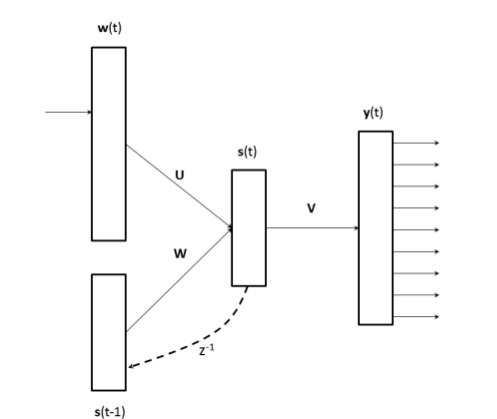

In [3]:
Image('images/mikolovmodel.png')

Use the hidden layer at $t-1$ as input to the network.

## Key contributions

* Using recurrent connections as context/history instead of using windows of tokens.

* Achieved 10.4% improvement for UPenn corpus over KN5 when predictions are averaged with other models.

## Backpropagation through time

BPTT works the same way as if each of the time steps were a separate layer. 

$$
\begin{align}
l_0 &= w \cdot x\\
l_i &= w \cdot f(l_{i-1})\\
y   &= l_2
\end{align}
$$

$$
\begin{align}
\dfrac{\partial y}{\partial w} &= f(l_1) + \underbrace{w\cdot f'(l_1)}_{\delta_1} \cdot \dfrac{\partial l_1}{\partial w} \\
\dfrac{\partial l_1}{\partial w} &= f(w \cdot x) + w\cdot f'(w \cdot x) \cdot \underbrace{x}_{\dfrac{\partial l_0}{\partial w}}
\end{align}
$$

It is equivalent to treating each $w$ as a separate parameter ($w = w_0 = w_1 = \ldots$), and then calculating gradients separately.

Knowing this, we can actually update parameters as we backpropagate through time since $\Delta w = \sum_i \Delta w_i$

## Word representation properties

Code for the project released [on Google code](https://code.google.com/p/word2vec/)

Trains data on some Wikipedia data, and then allows you to look at a word's neighbours in the vector space

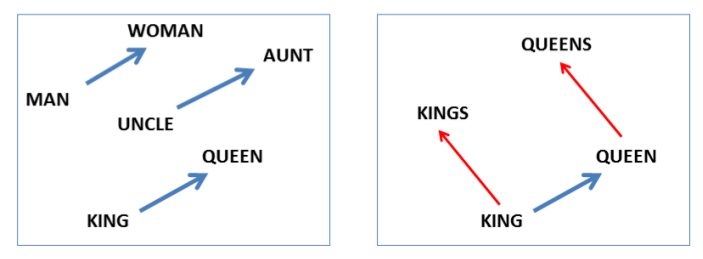

In [5]:
Image('images/wordvec.png')

## Dealing with huge output layer
###[Collobert, Ronan, and Jason Weston. "A unified architecture for natural language processing: Deep neural networks with multitask learning." Proceedings of the 25th international conference on Machine learning. ACM, 2008.](http://www.thespermwhale.com/jaseweston/papers/unified_nlp.pdf)

## Key contributions

Using neural networks for multi-task NLP learning: POS tagging, chunking, NER, semantic-role labeling and language models. Allow initial layers / word representations to generalise better for other tasks.

Computing final softmax layer in output layer is time consuming. We need to compute scores for all words in the vocabulary

$$
\frac{1}{ \sum_{j=1}^{L}{e^{ x ^\top W_j }} }
\begin{bmatrix}
e^{ x ^\top W_1 } \\
e^{ x ^\top W_2 } \\
\vdots \\
e^{ x ^\top W_L } \\
\end{bmatrix}
$$



Collobert & Weston's language model uses a neural network that looks at a fixed n-gram $s$ and outputs a score.



Substitute a random word into the n-gram and insist that it's score be at least 1 lower than the correct n-gram.

Cost function they optimise is a ranking-type cost:


$$\sum_{s \in S} \sum_{w \in W} \max(0,1-f(s)+f(s^w))$$

Sampling random words will reduce the need for computing for every word in the vocabulary.

# Applications of Word Vectors

##Recursive Autoencoders
[Socher, Richard, et al. "Semi-supervised recursive autoencoders for predicting sentiment distributions." Proceedings of the Conference on Empirical Methods in Natural Language Processing. Association for Computational Linguistics, 2011.](http://www.aclweb.org/anthology/D/D11/D11-1014.pdf)

[Socher, Richard, et al. "Recursive Deep Models for Semantic Compositionality Over a Sentiment Treebank"](http://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf)

An *autoencoder* is essentially an identity function: It's purpose is to produce it's input in the output layer.

A toy example would be to take in a one-hot vector of 8, and reproduce it in the output. If we allow only 3 units in the hidden layer, the network will find the appropriate representation.
<img src="http://blog.wtf.sg/wp-content/uploads/2014/05/Screenshot-from-2014-05-09-233355.png" width="70%" height="70%"/>

Training...


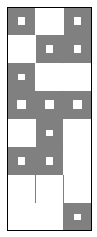

In [8]:
import autoencoder
autoencoder.run_experiment()

##Auto-encoders over sequences/structures


Minimise the errors between reproduced versions of the current input and the previous hidden-state

In [9]:
Image(url="http://blog.wtf.sg/wp-content/uploads/2014/05/autoencoder.png")

Using additional grammar information, combining the words according to the parse tree

In [10]:
Image(url="http://blog.wtf.sg/wp-content/uploads/2014/05/Screenshot-from-2014-05-10-041050.png")

##Machine Translation
[Mikolov, Tomas, Quoc V. Le, and Ilya Sutskever. "Exploiting similarities among languages for machine translation." arXiv preprint arXiv:1309.4168 (2013).](http://arxiv.org/pdf/1309.4168)

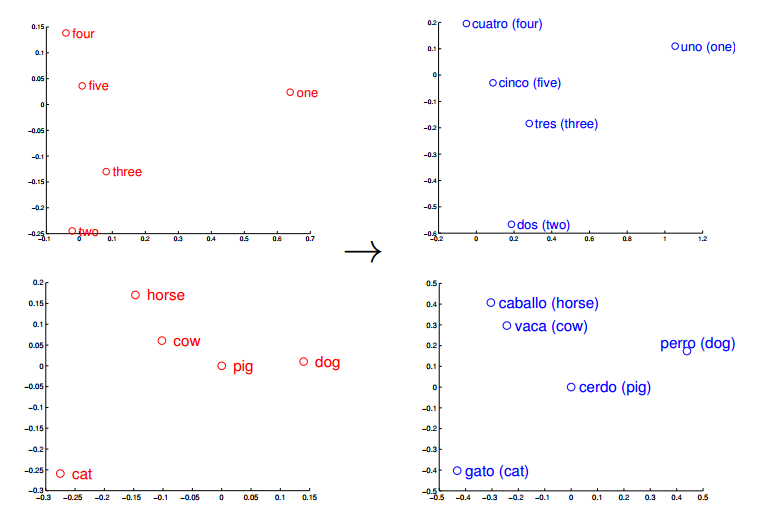

In [11]:
Image("images/mtrans.png")

Assumption is that word vectors in Spanish are a linear transformation away from their English counterparts

First we train English and Spanish word representations

Since we know some word pairings: ("one","uno"), etc.

We insist that vector for those English words after multiplying with a matrix $W$ (what we'll optimise) is not too far from vector for the corresponding Spanish word.

$$E = \sum_i ||x_i^{\top}W - z_i||^2$$

# Limitations of Word Vectors

The word vectors trained this way are useful, but it greatly depends on the task they're being used for.

At [Semantics3](https://www.semantics3.com) we need to match products across different sites, each with slightly different variations in their names:

> iPhone 5 Black

> iPhone Five Blk

> i Phone 5 Bk


The problem with trying to use the vectors pretrained from the word2vec project is that the words 'white' and 'black' would be really close in the vector space, because they would be in very similar contexts.

This task requires us to be able to say that these are very different, but yet, to know that 'five' and '5' are the same, and 'i' + 'Phone' and 'iPhone' are the same.

## Product Name Equivalency model

Take 2 names, extract the vectors for each of the tokens, sum and average each one, and then insist that the dot product passed through the sigmoid function gives a 1

$$v(w_1,\cdots,w_n) = \frac{1}{n} \sum_{i=1}^{n} C(w_i)$$

$$P((w_1,\cdots,w_n) = (w_1,\cdots,w_m)) := \sigma(v(w_1,\cdots,w_n)\cdot v(w_1,\cdots,w_m))$$

So after some training...

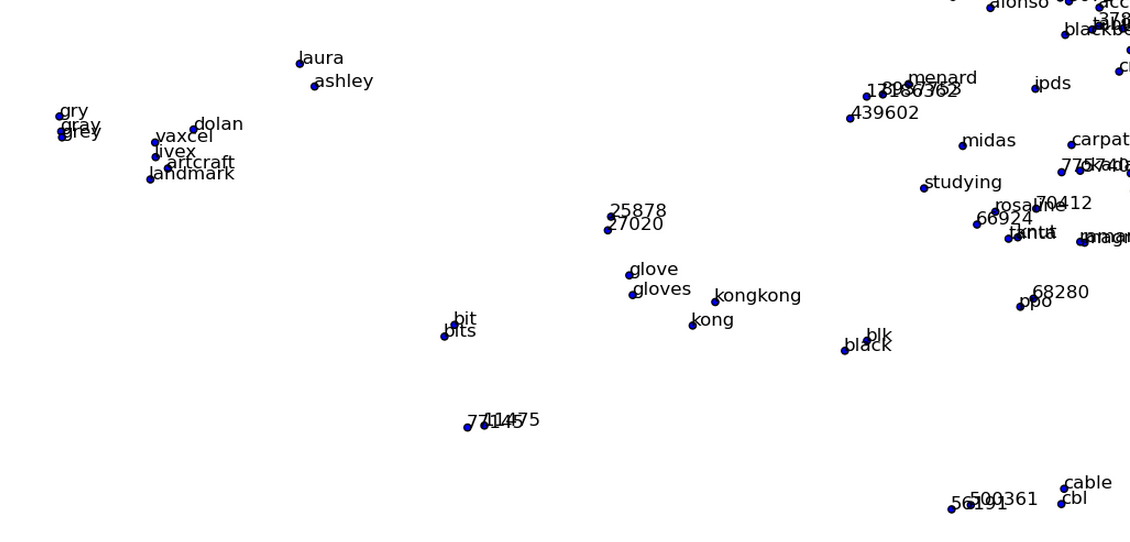

In [3]:
Image("images/equivmodel.png")

# Getting started...

[Theano](http://deeplearning.net/software/theano/) is a good library to get started with.

You create mathematical expressions which need to be compiled, and will then be optimised and translated to native or GPU code.

In [17]:
import theano
import theano.tensor as T

x = T.scalar('x')

squared = x**2
f = theano.function(inputs=[x],outputs=squared)
f(5)

array(25.0)

###Automatic Differentiation
With more complicated models these days, differentiation by hand might be error-prone. Since input is an expression tree, Theano can do the differentiation for you.

In [19]:
gradient = T.grad(squared,wrt=x)
f_prime = theano.function(inputs=[x],outputs=gradient)
f_prime(5)

array(10.0)

For an idea of how it works, we can take a look at SymPy

In [49]:
from sympy import *
init_printing()

z = Symbol('z')
f = z**2 + 3*z - 5
f

In [50]:
diff(f,wrt=z)

If you're already used to vectorising your code and working with MATLAB or numpy arrays, it isn't too hard to get started.

In [45]:
import numpy as np
f = Function('\sigmoid')
A = np.array([Symbol('x_1'),Symbol('x_2')])
B = np.array([  [Symbol('y_{1,1}'),Symbol('y_{1,2}')],
                [Symbol('y_{2,1}'),Symbol('y_{2,2}')]
            ])
np.dot(A,B).tolist()

# Ideas going forward..

1. Distributed word representations are useful, could explore ways of combining them like the RAE.
2. Extracting semantic meaning from combined sentences/phrases.
3. Successfully reconstructing sentence from sentence vector (applications in full sentence translation?)
4. [Kaggle NLP Challenge: Billion Word Imputation](http://www.kaggle.com/c/billion-word-imputation)


# Resources

1. [Geoffrey Hinton's class](https://www.coursera.org/course/neuralnets)
2. [Hugo Larochelle's online course](http://info.usherbrooke.ca/hlarochelle/neural_networks/content.html)
3. [Theano tutorials and documentation](http://deeplearning.net/software/theano/)
4. [Manning and Socher's talk: NLP without magic](http://nlp.stanford.edu/courses/NAACL2013/)